
<h1 style="border: 2px solid black; padding: 15px; border-radius: 12px;" align='center'>Notebook Word2Vec</h1>    

<h2 align='center'> Analyse de textes en Python</h2>

<h3 align='center'> ABADE Maxime </h3>
<h3 align='center'> Ing2 GSI - 2023/2024 </h3>

Word2Vec est une technique d'apprentissage, beaucoup utilisé en IA, de représentations vectorielles de mots à partir de données texte.
Le principe de Word2Vec repose sur l'idée que les mots ayant des contextes similaires tendent à avoir des significations qui se ressemblent.
Ainsi, au lieu de représenter les mots de manière isolée, Word2Vec les place comme un ensemble de vecteur ou plus les mots ont un contexte similaire, plus ils sont proches.

Il existe deux architectures principales dans Word2Vec : Skip-Gram et CBOW (Continuous Bag of Words)

<li>  Skip-Gram <br/>
  Skip-Gram a pour but de prédire le contexte à partir d'un mot. Pour cela il maximise les probabilités en observant d'autres mot voisin qui aurait le même contexte.

<li>  CBOW (Continuous bag of word) <br/>
  CBOW est une autre méthode qui elle permet de déterminer un mot à partir du contexte. De la même manière que Skip-Gram, on cherche à maximiser la probabilité.
      
CBOW est souvent plus rapide à entrainer que Skip-Gram. Mais Skip-Gram fonctionnent mieux sur un grand jeu de donner.


1. Identifier tout les mots uniques
2. Créer des paires mot-contexte
3. Entrainé le model

Une fois le modèle entrainé, on peut mesurer les similarités entre les mots, recherche de mots similaires, ou encore pour des taches d'apprentissage automatique.


In [40]:
# Import des bibliothèques nécessaires
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk

In [41]:
import bs4
import urllib.request
nltk.download('punkt')


# On récupère maintenant les données d'une page
url = 'https://fr.wikipedia.org/wiki/France'
response = urllib.request.urlopen(url)

# extraction du texte en html
html = response.read()
# print(html)

# On utilise un objet de la classe BeautifulSoup pour traiter du code html
texteMisEnForme = bs4.BeautifulSoup(html, 'html.parser')

# Trouver la balise du contenu principal
content_tag = texteMisEnForme.find('div', {'id': 'mw-content-text'})

# Si la balise n'est pas trouvée, essayez avec d'autres sélecteurs ou inspectez le code HTML de la page
if content_tag is None:
    content_tag = texteMisEnForme.find('div', {'class': 'mw-parser-output'})

# Si la balise n'est toujours pas trouvée, ajustez le sélecteur en fonction de la structure de la page
if content_tag is not None:
    text = content_tag.get_text()
    print(f"On a donc récupéré une chaîne de caractères composée de {len(text)} caractères.")
else:
    print("La balise du contenu n'a pas été trouvée.")
# Il faut maintenant extraire les mots de cette chaîne
tokens = nltk.word_tokenize(text.lower(), language='french')

print(f"On a une liste de {len(tokens)} tokens donc de groupes de caractères en minuscule.")

# On regarde souvent les fréquences de ces tokens
freq = nltk.FreqDist(tokens)


[nltk_data] Downloading package punkt to /home/max/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


On a donc récupéré une chaîne de caractères composée de 264382 caractères.
On a une liste de 51105 tokens donc de groupes de caractères en minuscule.


[nltk_data] Downloading package stopwords to /home/max/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


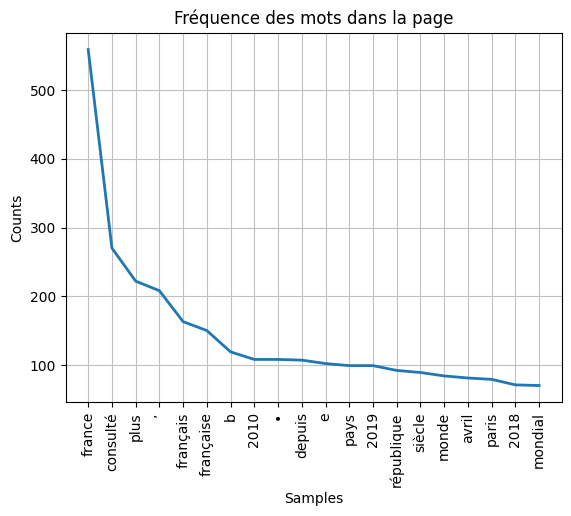

Mots synonymes à 'france': [('plus', 0.9996291995048523), ('depuis', 0.9996277093887329), ('français', 0.9995095133781433), ('pays', 0.9994940757751465), ('e', 0.999477744102478)]
Mots opposés à 'france': [('wikiwix', 0.2286996692419052), ('ressource', 0.21183502674102783), ('v', 0.1981821209192276), ('arménie', 0.1614566594362259), ('in', 0.1497752070426941)]


In [42]:
import urllib.request
import bs4
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import string
nltk.download('stopwords')

# Fonction pour récupérer le texte d'une page Wikipedia
def get_wikipedia_text(page_url):
    # On récupère maintenant les données d'une page
    response = urllib.request.urlopen(page_url)

    # Extraction du texte en HTML
    html = response.read()

    # On utilise un objet de la classe BeautifulSoup pour traiter du code HTML
    soup = bs4.BeautifulSoup(html, 'html.parser')

    # On récupère tout le code à partir de la balise dont la suite nous intéresse
    content_tag = soup.find('div', {'id': 'mw-content-text'})

    # Si la balise n'est pas trouvée, essayez avec d'autres sélecteurs ou inspectez le code HTML de la page
    if content_tag is None:
        content_tag = soup.find('div', {'class': 'mw-parser-output'})

    # Si la balise n'est toujours pas trouvée, ajustez le sélecteur en fonction de la structure de la page
    if content_tag is not None:

        # Exclure certaines balises spécifiques, comme les balises "span"
        for tag in content_tag.find_all(['span']):
          tag.decompose()

        text = content_tag.get_text()
        return text
    else:
        raise ValueError("La balise du contenu n'a pas été trouvée.")

# Récupération du texte de la page Wikipedia de l'Empire carolingien
wikipedia_url = 'https://fr.wikipedia.org/wiki/France'
wikipedia_text = get_wikipedia_text(wikipedia_url)

# Créons une liste de mots vides + mots que l'on ajoute nous-mêmes + ponctuation
stop_words = set(stopwords.words('french') + ['les', 'a', 'il', '+', ',', '<', '>','↑', '«', '»', 'p.', "''"] + list(string.punctuation))

# On fait le ménage dans les tokens
tokens_propres = [word for word in tokens if word.lower() not in stop_words]

# Puis on regarde à nouveau les mots les plus fréquents
freq = nltk.FreqDist(tokens_propres)

# Affichage des 20 mots les plus fréquents
freq.plot(20, title='Fréquence des mots dans la page')

# Entraînement du modèle Word2Vec
model = Word2Vec([tokens_propres], vector_size=100, window=5, min_count=5, workers=4)

# Enregistrement du modèle
model.save("word2vec_model.model")

# Chargement du modèle
model = Word2Vec.load("word2vec_model.model")
sims = model.wv.most_similar('france', topn=5)  # Obtenir les mots synonymes
print("Mots synonymes à 'france':",sims)

# Recherche des mots opposés à "téléviseur"
opposite_words = model.wv.most_similar(negative=['france'], topn=5)  # Obtenir les mots opposés
print("Mots opposés à 'france':", opposite_words)




Nous avons décidé de porter notre application de Word2Vec sur une page Wikipédia que nous avons extraite puis Tokeniser.

Après plusieurs essaie, nous avons observé que certains caractères présents fausser notre analyse. Nous avons donc rajouté certain caractère a nos stopword.

On n'observe sur le graphique ci-dessus que le mot le plus présent est "télévision", présent plus de 8000 fois.

On a ensuite sélectionné les mots les plus similaires de "modifier" et les moins similaires.  

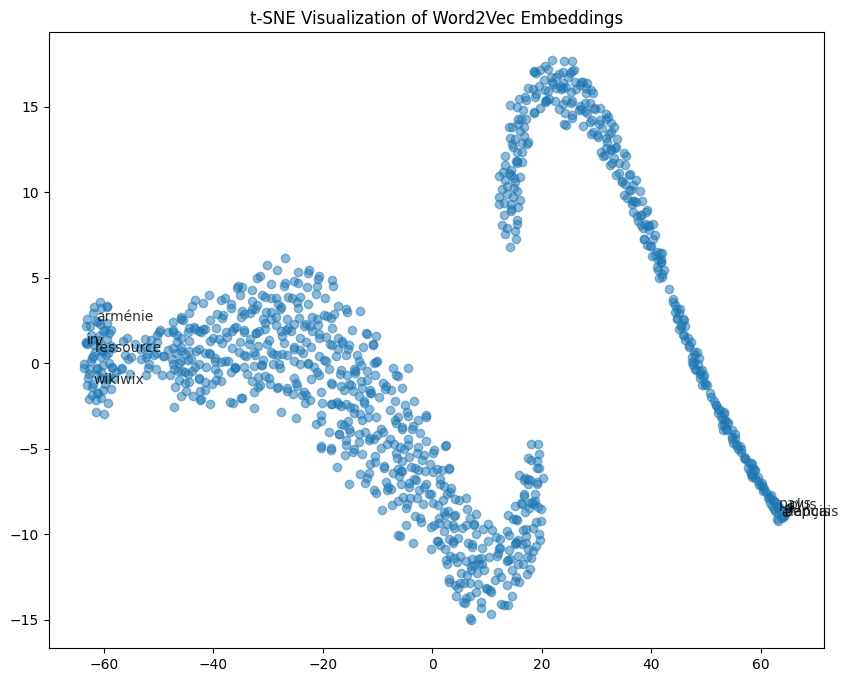

In [43]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

# Get word vectors from the Word2Vec model
word_vectors = model.wv.vectors


# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2D = tsne.fit_transform(word_vectors)

# Get vocabulary from the Word2Vec model
vocab = list(model.wv.index_to_key)

# Create a DataFrame for easy manipulation with pandas (optional)
df = pd.DataFrame(word_vectors_2D, index=vocab, columns=['x', 'y'])

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(df['x'], df['y'], alpha=0.5)

# Annotate some points (optional)
for word,value in sims + opposite_words:
    plt.annotate(word, (df.loc[word, 'x'], df.loc[word, 'y']), alpha=0.8, fontsize=10)

plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.show()



Le nuage de points ci-dessus représente notre modèle. Chaque point est un mot, leur proximité symbolise leur similarité. On voit que pour sièges les mots les plus similaires sont à côté, alors que les moins similaires sont très éloignés.